<!-- Student -->
# Introduction to Computational Physics - Week 8 ##

<!-- Student -->
## Table of contents week 8

Introduction to Computational Physics - Week 8: [>>](#Introduction-to-Computational-Physics---Week-8)  
-Table of contents week 8: [>>](#Table-of-contents-week-8)  
-Introduction to week 8: [>>](#Introduction-to-week-8)  
-Numerical solution of equations: [>>](#Numerical-solution-of-equations)  
--Graphical approach: [>>](#Graphical-approach)  
--Week 8 exercise 1: [>>](#Week-8-exercise-1)  
--Solving equation using Numpy: [>>](#Solving-equation-using-Numpy)  
--Week 8 exercise 2: [>>](#Week-8-exercise-2)  
--Week 8 exercise 3: [>>](#Week-8-exercise-3)  
--Week 8 exercise 4: [>>](#Week-8-exercise-4)  
--Week 8 exercise 5: [>>](#Week-8-exercise-5)  
-Image analysis with Numpy: [>>](#Image-analysis-with-Numpy)  
--Week 8 exercise 6: [>>](#Week-8-exercise-6)  
--Week 8 exercise 7: [>>](#Week-8-exercise-7)  

<!-- Student -->
## Introduction to week 8

Computer programs written in languages like Fortran, C and Java are compiled before they are run. This means the original source code is converted into an executable file. The program is actually run in a separate step, using the executable file. In contrast,  Python code is interpreted statement by statement at the time that the program is run. The two approaches have their advantages and disadvantages. The advantage of the separate compilation step is that, as the entire program is compiled in one go, it can be optimised to ensure that it uses the computer's memory and processors as efficiently as possible. The disadvantage is that the development process takes more time. If you change anything, you have to compile the entire program again before you can run it and test it. This is one of the reasons that developing programs using Python is usually considerably quicker than working in C, Fortran or Java. The downside is that Python programs are usually slower. For many applications, this isn't a problem, but in some scientific analyses, for example involving large datasets, it can cause difficulties. This is where Numpy can be very useful. It allows programs to be written using Python, but the underlying Numpy code has been written in C and compiled, allowing execution at high speed. Learning to use Numpy effectively is therefore a useful skill for scientific programmers.

This week we will look at an example of how Numpy arrays can be used to solve equations numerically, and then illustrate how the same technique can be used to do some image processing. The idea is not so much that the techniques used are the best available for solving equations or edge-finding in images, but that they show how Numpy functions can often be used as alternatives to Python control structures in scientific programming. 

<!-- Student -->
## Numerical solution of equations

### Graphical approach

Suppose we have a function $y(x)$ and we want to know the values of $x$ where it crosses a threshold value $T$, i.e. we want to solve the equation $y(x) = T$. We could do this using a graph:

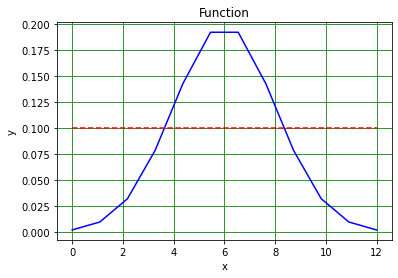

In [1]:
# <!-- Student -->
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
def gaussFunc(mu, sigma, x):
    g = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x - mu)**2/(2*sigma**2))
    return g
#
mu = 6.0
sigma = 2.0
#
thresh = 0.1
#
xMin = 0.0
xMax = 12.0
nPoints = 12
xArr = np.linspace(xMin, xMax, nPoints)
#
yArr = gaussFunc(mu, sigma, xArr)
#
plt.figure(figsize = (6, 4))
plt.title("Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, color = 'b', linestyle = '-')
plt.plot(xArr, thresh*np.ones(nPoints), color = 'r', linestyle = '--')
plt.grid(color = 'g')
plt.show()

<!-- Student -->
### Week 8 exercise 1

Determine the solutions of the equation $y(x) = T$ from the graph above. How could the precision of the solutions be increased?

<!-- Student -->
### Solving equation using Numpy
As an alternative to the graphical solution, we could also manipulate the Numpy array that contains the values of the function in the following way.

The first step is to make a logical (or boolean) array that is `True` where the function is above the threshold `thresh` and `False` otherwise. 

In [2]:
# <!-- Student -->
#
LyArr = yArr > thresh

<!-- Student -->
### Week 8 exercise 2

Print out the values of the array `LyArr`. Convert the array from type `bool` to type `int` and print out these values. Use a Numpy function to sum the contents of both the boolean and integer arrays. Compare the results!

<!-- Student -->
We then make another version of the logical array in which all the elements are shifted to the left.

In [3]:
# <!-- Student -->
#
LyArrXL = np.zeros(nPoints).astype(bool)
shiftX = 1
LyArrXL[0:nPoints - shiftX] = LyArr[shiftX:nPoints]
print("LyArr\n",LyArr)
print("LyArrXL\n",LyArrXL)

LyArr
 [False False False False  True  True  True  True False False False False]
LyArrXL
 [False False False  True  True  True  True False False False False False]


<!-- Student -->
Now we take the logical `not` of the first array. 

In [4]:
# <!-- Student -->
#
LyArrNot = np.logical_not(LyArr)
print("LyArrXL\n",LyArrXL)
print("LyArrNot\n",LyArrNot)

LyArrXL
 [False False False  True  True  True  True False False False False False]
LyArrNot
 [ True  True  True  True False False False False  True  True  True  True]


<!-- Student -->
Taking the logical `and` of `LyArrXL` and `LyArrNot`, we can determine the left-hand position in the array which corresponds to the place where the function crosses the threshold, as below.

In [5]:
# <!-- Student -->
#
boolThrL = np.logical_and(LyArrNot, LyArrXL)
print("boolThrL\n",boolThrL)

boolThrL
 [False False False  True False False False False False False False False]


<!-- Student -->
We can now get the left-hand $x$ value at which the function crosses the threshold using a further feature of Numpy arrays: if we use a set of logical values as the indices of an array, the values that are returned are those with index `True`. This is shown below.

In [6]:
# <!-- Student -->
#
xThrL = xArr[boolThrL]
np.set_printoptions(precision = 2)
print("xThrL",xThrL)

xThrL [3.27]


<!-- Student -->
### Week 8 exercise 3
Make a plot to show that the $x$ value above is (approximately!) in the correct position.

<!-- Student -->
### Week 8 exercise 4

How could the precision of the $x$ value of the crossing point be improved?

<!-- Student -->
### Week 8 exercise 5

Copy the code above and edit it so that it finds the position of the right-hand point at which the gaussian function crosses the threshold. Plot a graph showing the position of the right-hand crossing point.

<!-- Student -->
## Image analysis with Numpy

Numpy can also be used to analyse images. The example below shows how a picture of a telescope can be read into Numpy and then manipulated so that only pixels above a certain threshold are displayed.

As an aside, if you want to manipluate images using Python, the `scipy.ndimage` package provides a large range of image analysis software available; see [here](https://docs.scipy.org/doc/scipy/reference/ndimage.html) for more information!

Date and time  2021-01-10 14:58:08.699292
RGB image
Number of rows 1064 of columns 684 of pixels 727776 and depth 3
RGB min and max pixel values: 0 255
Greyscale min and max pixel values: 0 237
 


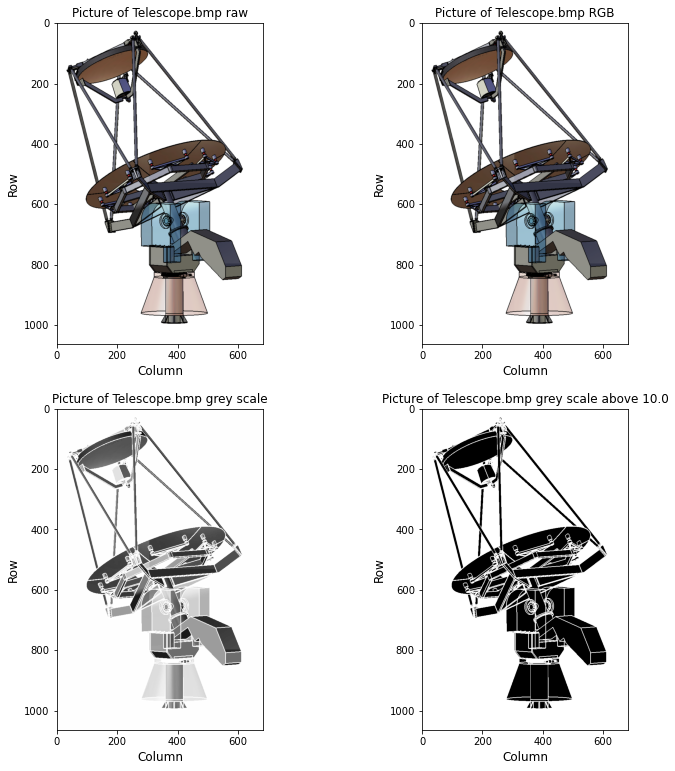

 
Date and time 2021-01-10 14:58:09.343607
Time since last check is 0:00:00.644315


In [7]:
# <!-- Student -->
#
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
#
def rgba2rgb(rgba, background = (255, 255, 255)):
    '''
    Function to convert RGBA images into RGB format. Input RGBA image (and background); output RGB image
    '''
    rows, cols, chans = rgba.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
            return rgba
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 4, 'RGBA image must have 4 channels.'
    #
    rgb = np.zeros((rows, cols, 3), dtype = 'float32')
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    #
    a = np.asarray(a, dtype='float32')/255.0
    #
    R, G, B = background
    #
    rgb[:, :, 0] = r*a + (1.0 - a)*R
    rgb[:, :, 1] = g*a + (1.0 - a)*G
    rgb[:, :, 2] = b*a + (1.0 - a)*B
    #
    return np.asarray(rgb, dtype = np.uint8)
#
def rgb2grey(rgb, negative = 0):
    '''
    Convert RGB image to greyscale. Input RGB, output greyscale image.
    '''
    rows, cols, chans = rgb.shape
    #
    debug = True
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
        elif chans == 1:
            print("Greyscale image")
            return rgb
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 3, 'RGB image must have 3 channels.'
    #
    grey = np.zeros((rows, cols), dtype = 'float32')
    #
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #
    grey[:, :] = (0.2125*(r*negative + (negative - 1.0)*r) + 
                  0.7154*(g*negative + (negative - 1.0)*g) + 
                  0.0721*(b*negative + (negative - 1.0)*b))
    #
    return np.asarray(grey, dtype = np.uint8)
#
# Read in image
imFile = "Telescope.bmp"
#imFile = "Shark.jpg"
#
imgRaw = plt.imread(imFile)
nRows = imgRaw.shape[0] # row corresponds to pixel's y coordinate
nCols = imgRaw.shape[1] # col corresponds to pixel's x ccordinate
nDepth = imgRaw.shape[2] # depth == 3 for red, blue green (RBG), == 4 for RBGA (A is alpha, i.e. transparency) 
img = np.zeros((nRows, nCols))
#
if nDepth == 4:
    imgRGB = rgba2rgb(imgRaw)
    img = rgb2grey(imgRGB)
elif nDepth == 3:
    imgRGB = imgRaw
    img = rgb2grey(imgRGB)
elif nDepth == 1:
    imgRGB = imgRaw
    img = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
#
print("Number of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
print("RGB min and max pixel values:",np.amin(imgRGB), np.amax(imgRGB))
print("Greyscale min and max pixel values:",np.amin(img), np.amax(img))
#
# Set threshold for finding edges, thresh ~ 98 for shark, thresh ~ 10 for telescope
thresh = 10.0
#thresh = 98.0
imgThr = np.zeros((nRows, nCols))
imgThr = img > thresh
#
print(" ")
fig = plt.figure(figsize=(12, 13))
fig.add_subplot(2, 2, 1)
plt.title("Picture of " + imFile + " raw")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRaw)
#
fig.add_subplot(2, 2, 2)
plt.title("Picture of " + imFile + " RGB")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRGB)
#
fig.add_subplot(2, 2, 3)
plt.title("Picture of " + imFile + " grey scale")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(img, cmap = "Greys")
#
fig.add_subplot(2, 2, 4)
plt.title("Picture of " + imFile + " grey scale above " + str(thresh))
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgThr, cmap = "Greys")
#
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

<!-- Student -->

This "thresholded" image is a two-dimensional equivalent of the one-dimensional region of the gaussian which is greater that the threshold value above. We can therefore use a two-dimensional version of our "shift left and right" algorithm to find where the threshold is crossed, which will give as the edges of the thresholded figure. Working in two dimensions means we have to both shift left and right and shift up and down.

Date and time 2021-01-10 14:58:11.808279
Min intensity in image 0 max intensity 237
nRows 1064 nCols 684
shiftR 3 shiftC 3
 


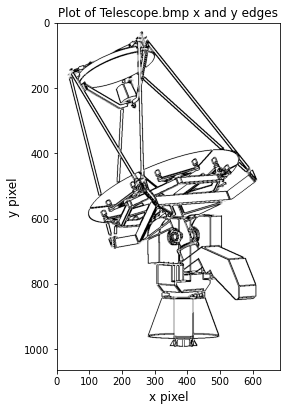

 
Date and time 2021-01-10 14:58:11.988771
Time since last check is 0:00:00.180492


In [8]:
# <!-- Student -->
#
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
imgMin = np.amin(img)
imgMax = np.amax(img)
print("Min intensity in image",imgMin,"max intensity",imgMax)
#
shiftR = 3
shiftC = 3
print("nRows",nRows,"nCols",nCols)
print("shiftR",shiftR,"shiftC",shiftC)
imgEdge = np.full((nRows, nCols), False)
imgEdge[0:nRows - shiftR, 0:nCols - shiftC] = \
   np.logical_or(np.logical_or(np.logical_and(imgThr[0:nRows - shiftR, 0:nCols - shiftC], 
                                              np.logical_not(imgThr[0:nRows - shiftR, shiftC:nCols])),   # horizontal left
                               np.logical_and(np.logical_not(imgThr[0:nRows - shiftR, 0:nCols - shiftC]),
                                              imgThr[0:nRows - shiftR, shiftC:nCols])),                  # horizontal right
                 np.logical_or(np.logical_and(np.logical_not(imgThr[0:nRows - shiftR, 0:nCols - shiftC]), 
                                              imgThr[shiftR:nRows, 0:nCols - shiftC]),                   # vertical bottom
                               np.logical_and(imgThr[0:nRows - shiftR, 0:nCols - shiftC], 
                                              np.logical_not(imgThr[shiftR:nRows, 0:nCols - shiftC]))))  # vertical top
imgEdge[0:nRows, 0] = False
imgEdge[0, 0:nCols] = False
imgEdge[0:nRows, nCols - shiftC - 1] = False
imgEdge[nRows - shiftR - 1, 0:nCols] = False
#
print(" ")
fig = plt.figure(figsize=(4, 8))
plt.title("Plot of " +  imFile + " x and y edges", fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
plt.imshow(imgEdge, cmap = "Greys")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

<!-- Student -->
### Week 8 exercise 6

Copy the code cell above and change the parameters in it so that only horizontal edges in the image are identified. Does this mean you have to remove the "shift left and right" (shift columns) operation or the "shift up and down" (shift rows) operation from the image manipulation?

<!-- Student -->
### Week 8 exercise 7

Copy the relevant code cells from above and edit them so that you read in the image *penguin.jpg*. Adjust the threshold to get the clearest outline you can of the penguin in the image.